<a href="https://colab.research.google.com/github/urmila-24/ML-Assignments/blob/main/201951164_URMILA_RATHORE_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612/652, CS/IT 308 Machine Learning </center>
## <center> Lab#6 Support vector machine (SVM)</center>

**Problem 1)** Classify the given data using linear SVM algorithm.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [4]:
# linear data
x = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

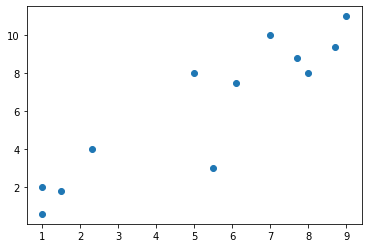

In [5]:
# show unclassified data
plt.scatter(x, y)
plt.show()

In [7]:
# shaping data for training the model
training_X = np.vstack((x, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [9]:
# define the model
clf = SVC(kernel = 'linear',C = 1)

In [10]:
# train the model
clf.fit(training_X,training_y)

SVC(C=1, kernel='linear')

weight =  [0.1332713  0.42667492]
y_offset =  -0.31234857056528953
y_values :  [7.06178311 6.97891513 6.89604714 6.81317915 6.73031116 6.64744317
 6.56457518 6.4817072  6.39883921 6.31597122 6.23310323 6.15023524
 6.06736726 5.98449927 5.90163128 5.81876329 5.7358953  5.65302732
 5.57015933 5.48729134 5.40442335 5.32155536 5.23868737 5.15581939
 5.0729514  4.99008341 4.90721542 4.82434743 4.74147945 4.65861146
 4.57574347 4.49287548 4.41000749 4.32713951 4.24427152 4.16140353
 4.07853554 3.99566755 3.91279957 3.82993158 3.74706359 3.6641956
 3.58132761 3.49845962 3.41559164 3.33272365 3.24985566 3.16698767
 3.08411968 3.0012517 ]


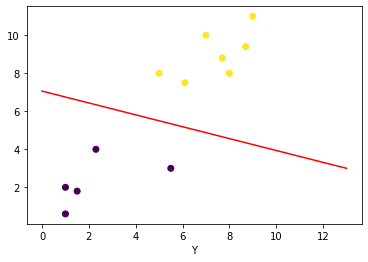

In [11]:
# get the weight values for the linear equation from the trained SVM model
weight = clf.coef_[0]
print('weight = ',weight)
# get the y-offset for the linear equation
y_offset = -weight[0]/weight[1]
print('y_offset = ',y_offset)
# make the x-axis space for the data points
X_space = np.linspace(0,13)
# get the y-values to plot the decision boundary
y_values = y_offset*X_space - clf.intercept_/weight[1]
print('y_values : ',y_values)
# plot the decision boundary
plt.plot(X_space,y_values, 'r')
# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.xlabel('X')
plt.xlabel('Y')
plt.show()


**Problem 2)** Load the data. The data description can be found in below link.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<br>

Split the data to train and test set. More information can be found here.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>

Write a code for linear SVM model. Examples can be found here.

https://github.com/soloice/SVM-python

https://gist.github.com/mblondel/586753/f740949d0336484567dd422fe53445ac8821f5b2

<br>

Learn and test the model for different hyperparameters and check the accuracy.


In [ ]:
#  Write code here
df = pd.read_csv('data_banknote_authentication.csv')
X = df.drop(['Class'],axis = 1)
y = df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)
kernel = ['rbf','linear','poly']
C = [1,10]
Scores = []
for ker in kernel:
    for c in C:
        clf = SVC(C = c,kernel = ker)
        clf.fit(X,y)
        print("params : ",'{',c,ker,'}','score = ',clf.score(X,y))




**Problem 3)** Classify the given data using non-linear SVM.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [15]:
# non-linear data
circle_x1, circle_x2 = datasets.make_circles(n_samples=300, noise=0.05)

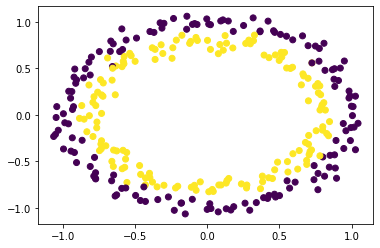

In [16]:
# show raw non-linear data
plt.scatter(circle_x1[:, 0], circle_x1[:, 1], c=circle_x2)
plt.show()

In [ ]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [ ]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC(C=1e-05)

In [ ]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
    

       

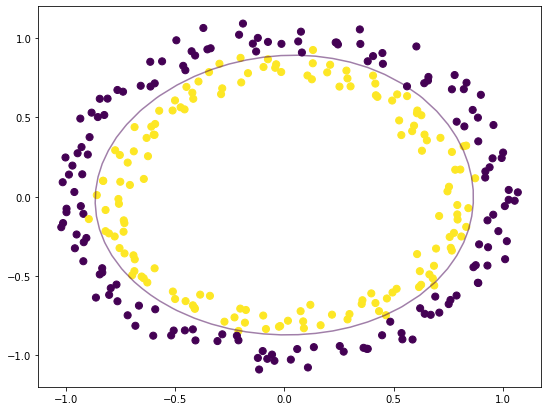

In [ ]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

